<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Predicci%C3%B3n_emisi%C3%B3n_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usar Sklearn para implementar el modelo de regresión lineal (usar la ecuacion normal y Gradiente Estocástico) en el Dataset FuelConsumption.csv para predecir la emisión de CO2 de algunos autos basado en algunas de sus características. Recuerde que en sklearn puede implementar el gradiente de descenso importando:
from sklearn.linear_model import SGDRegressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/FuelConsumption.csv')

In [ ]:
data.info()    #primero a hacer todo el mapeo para conocer el dataset, lo básico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
data.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
899,2014,PORSCHE,CAYMAN S,TWO-SEATER,3.4,6,AM7,Z,11.3,7.9,9.8,29,225
278,2014,CHRYSLER,200 CONVERTIBLE FFV,COMPACT,3.6,6,A6,E,17.0,11.2,14.4,20,230
669,2014,LEXUS,LS 460,MID-SIZE,4.6,8,AS8,Z,14.5,9.6,12.3,23,283
768,2014,MERCEDES-BENZ,S 550 4MATIC SWB,FULL-SIZE,4.7,8,AS7,Z,14.2,9.4,12.0,24,276
544,2014,INFINITI,QX70 AWD,SUV - SMALL,3.7,6,AS7,Z,14.5,10.7,12.8,22,294


In [ ]:
X=data.loc[:,['ENGINESIZE','FUELTYPE','FUELCONSUMPTION_CITY']]        #separar especificamente valores por colunar
y = data['CO2EMISSIONS']

In [ ]:
X=pd.get_dummies(X, drop_first=True)      #recuerda que los dummies convierte la info categórica en variables de indicación, los hace columnas pues

In [ ]:
X.head()            #visualizar la separación

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,9.9,0,0,1
1,2.4,11.2,0,0,1
2,1.5,6.0,0,0,1
3,3.5,12.7,0,0,1
4,3.5,12.1,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [ ]:
X.shape

(1067, 5)

In [ ]:
y.shape

(1067,)

In [ ]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('linear_regression', LinearRegression() )    
))            #revisa en notas pipeline y eso hace

In [ ]:
model.fit(X_train,y_train)      #acomoda el modelo

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [ ]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)              #saca los erores, es decir, la distancia del "modelo" al punto en sí y la presición

0.9905292971987586

In [ ]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('SGD', SGDRegressor(max_iter=1000, penalty=None))
 ))

In [ ]:
param_range=np.arange(1,100)                  #saca parametros para coparar entre datos de entrenamiento y validación
train_score, val_score=validation_curve(model, X_train, y_train, param_name='SGD__max_iter', param_range=param_range, cv=5, n_jobs=-1)

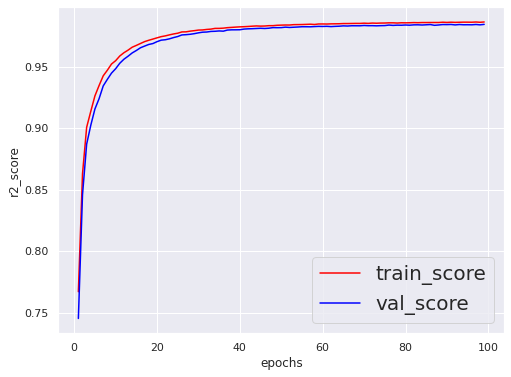

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(param_range, np.mean(train_score,1), color='red',label='train_score')
plt.plot(param_range, np.mean(val_score,1), color='blue', label='val_score')              #en este código ya losgrafica y compara
plt.legend( fontsize=20)
plt.xlabel('epochs')
plt.ylabel('r2_score');

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('SGD', SGDRegressor(penalty=None))])

In [ ]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)                              #igual acá

0.9901104672180132

In [ ]:
#función de coste cualquiera
import numpy as np
costo = lambda w: np.sin(1/2 * w[0]**2 - 1/4 * w[1]**2 + 3) * np.cos(2*w[0] - np.e**w[1]) #crea algo así como una función de gradiente descendente, donde el costo es w[0] que es el bias
costo([1,2])

0.374762046993176

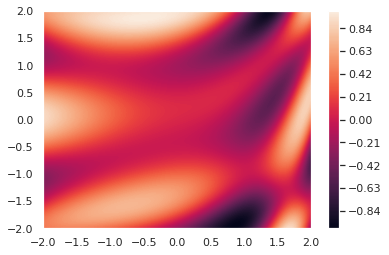

In [ ]:
import matplotlib.pyplot as plt
#forma
N = 200
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))                                                           #Grafica para medir la relación de datos (o eso entiendo yo)
for i,xi in enumerate(x):
  for j,yj in enumerate(y):
    z[i,j] = costo([xi,yj])
plt.contourf(x,y,z,200)
plt.colorbar()
plt.show()

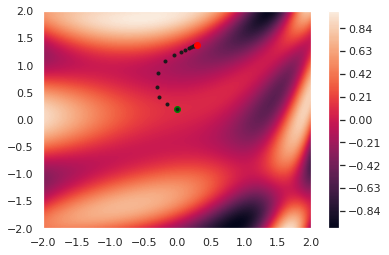

In [ ]:
plt.contourf(x,y,z,200)
plt.colorbar()
np.random.seed(4)
Ws = np.random.rand(2) * 2 - 1
Ws = [0,0.2]
Wc = np.copy(Ws)
h = 0.01
alpha = 0.005
grad = np.zeros(2)
plt.plot(Ws[0],Ws[1],'o',c='green')
for _ in range(100000): # cantidad de iteraciones
  for it, w in enumerate(Ws):
    Wc = np.copy(Ws)
    Wc[it] = Wc[it] + h
    derivada = (costo(Wc) -costo (Ws))/h #derivada parcial por diferencias mínimas
    grad[it] = derivada
    
  Ws = Ws - alpha * grad
  
  if _%100 == 0:
    plt.plot(Ws[0],Ws[1], 'k.')
    
plt.plot(Ws[0],Ws[1],'o',c='red')